#Augmented Perspective

This iPython Notebook runs the the Augmented Perspective experiment flow

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where your augmented perspective repo is checked out
# e.g. 'projects/augmented-perspective':
# if FOLDERNAME, current directory of the iPython notebook will be used
FOLDERNAME = 'CS231A/augmented-perspective'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cd $FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive
/content/drive/.shortcut-targets-by-id/1g15eqMB8VyviBypnBlOVm8H-tu-OksvO/augmented-perspective


Then, you should be able to run the following with no problem.

In [2]:
%load_ext autoreload
%autoreload 2

import importlib
import sys

# pre-import everything to save time
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import torch

!nvidia-smi 
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
    torch.cuda.empty_cache() 
print("Using {} for computation".format(device))

Sun Mar 13 20:44:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# try import project libraries
import augmented_perspective
import calibration
import depth_model


Run the depth model with GPU againsts assets/kitti2.png

before ['runner.py', '--image_path', 'assets/kitti2.png', '--device', 'cuda']
after ['runner.py', '--image_path', 'assets/kitti2.png', '--device', 'cuda']
Namespace(boosting=True, device='cuda', image_files=['kitti2.png'], image_path='../../assets', model_name='mono_1024x320', monodepth2=True, output_path='../../outputs/')
-> Loading model from  models/mono_1024x320
   Loading pretrained encoder
   Loading pretrained decoder
Reading images from ../../assets
-> Predicting on 1 test images
input_image.shape:  torch.Size([1, 3, 320, 1024])
disp.shape:  torch.Size([1, 1, 320, 1024])
disp_resized.shape:  torch.Size([1, 1, 370, 1224])
scaled_disp.shape:  torch.Size([1, 1, 320, 1024])
disp_resized_np.shape:  (370, 1224)
   Processed 1 of 1 images - saved predictions to:
   - ../../outputs/kitti2_monodepth2_depth.png
   - ../../outputs/kitti2_monodepth2_disp.npy
-> Done!
Reading images from ../../assets
device: cuda
----------------- Options ---------------
                    Final: False    

Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_main


start processing
processing image 0 : kitti2
	 wholeImage being processed in : 1920
 	 	 DEBUG| GPU THRESHOLD REACHED 1920 ---> 1568
Adjust factor is: 1.3008887614678901
Selecting patchs ...
Target resolution:  (1510, 4995, 3)
Dynamicly change merged-in resolution; scale: 0.24503311258278146
	 Resulted depthmap res will be : (370, 1224)
patchs to process: 29
	 processing patch 0 | [  2   2 329 329]
	 processing patch 1 | [ 73   2 329 329]
	 processing patch 2 | [143   2 329 329]
	 processing patch 3 | [214   2 329 329]
	 processing patch 4 | [284   2 329 329]
	 processing patch 5 | [355   2 329 329]
	 processing patch 6 | [425   2 329 329]
	 processing patch 7 | [496   2 329 329]
	 processing patch 8 | [107 107 259 259]
	 processing patch 9 | [177 107 259 259]
	 processing patch 10 | [248 107 259 259]
	 processing patch 11 | [319 107 259 259]
	 processing patch 12 | [389 107 259 259]
	 processing patch 13 | [460 107 259 259]
	 processing patch 14 | [530 107 259 259]
	 processing patch 

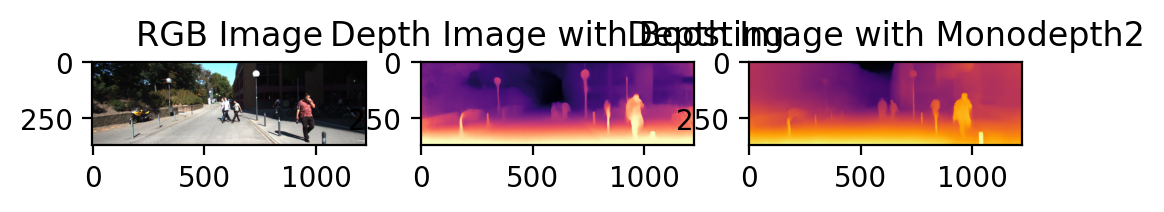

In [6]:
importlib.reload(depth_model)
argv = ["runner.py", "--image_path", "assets/kitti2.png", "--device", device]
depth_model.run_depth_model(argv)
original_image = io.imread("assets/kitti2.png")
depth_image_after_monodepth2 = io.imread("outputs/kitti2_monodepth2_depth.png")
depth_map_after_monodepth2 = np.load("outputs/kitti2_monodepth2_depth.npy")
print("Depth Map Size After Monodepth:{}".format(depth_map_after_monodepth2.shape))
depth_image_after_boosting = io.imread("outputs/kitti2_boosting_depth.png")
depth_map_after_boosting = np.load("outputs/kitti2_boosting_depth.npy")
print("Depth Map Size After Boosting:{}".format(depth_map_after_boosting.shape))


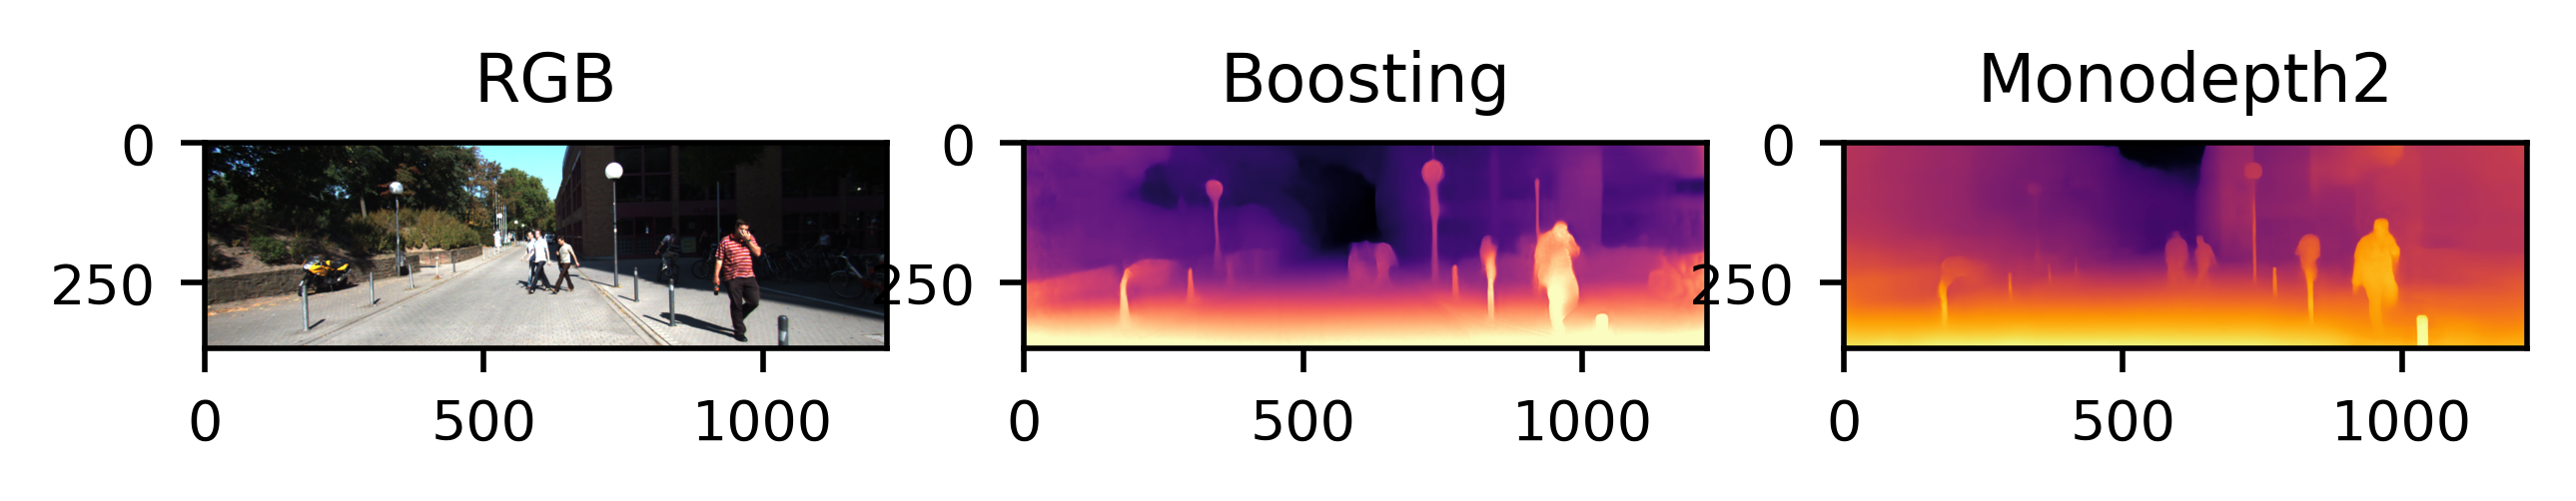

In [10]:
plt.rcParams.update({'font.size': 8})
f, ax = plt.subplots(1, 3, dpi=500)
ax[0].imshow(original_image)
ax[0].title.set_text('RGB')
ax[1].imshow(depth_image_after_monodepth2)
ax[1].title.set_text('Boosting')
ax[2].imshow(depth_image_after_boosting)
ax[2].title.set_text('Monodepth2')